In [1]:
import logging
import numpy as np
import perceval as pcvl
from perceval.algorithm import Sampler
from perceval.components import PS, BS
import sys

from utils import svd_decomposition, print_circuit_structure, build_prcvl_circuit
from clements import decompose_clements
from tools.decomposition import decomposition

logging.basicConfig(
    stream=sys.stdout,      # Direct logs to stdout
    level=logging.DEBUG
)

### INPUT

In [2]:
X = np.array([
    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
])

### 8x8 -> 6x6

In [3]:
X_att = decomposition(X)

### SVD Decomposition

In [4]:
U, S, Vt = svd_decomposition(X_att)

DEBUG:root:--- 1. Original Matrix A ---
DEBUG:root:[[-5.11574817e-01  1.34306005e-20  1.90563742e-20 -5.34476790e-21
   1.37148524e-20  2.05432271e-20]
 [ 1.68243816e-19 -5.11574817e-01 -1.95754455e-21 -1.22357790e+00
   8.53279518e-01  8.53279518e-01]
 [ 7.08215363e-21  9.43275669e-20  1.74228253e+00  1.00783341e-17
  -2.42205202e-19 -2.62356487e-19]
 [-1.80969462e-20 -1.45688782e+00 -7.82064326e-19  1.74228253e+00
   6.07534357e-14 -6.07543899e-14]
 [-2.00510158e-19 -1.09195906e-14 -2.26556862e-21 -8.04419457e-01
  -1.12194679e+00 -1.53928709e-14]
 [-7.30355280e-20  1.09137077e-14 -2.53798589e-21 -8.04419457e-01
   1.54361892e-14 -1.12194679e+00]]
DEBUG:root:Input Matrix Shape: (6, 6)
DEBUG:root:--- 2. Decomposition Components ---
DEBUG:root:Matrix U (Left Singular Vectors):
DEBUG:root:[[-1.20729939e-20  1.38438277e-20 -4.61781861e-19 -1.76197444e-19
  -1.97434632e-19 -1.00000000e+00]
 [ 3.42871515e-01 -3.61776581e-15 -8.71282925e-01  4.60714800e-13
   3.51148386e-01  3.28874312e-19]

### Building Circuit with Clement's decomposition

#### For Vt

In [5]:
V_c = decompose_clements(Vt)
[v_phis, v_thetas, v_alphas] = V_c
v_circ = build_prcvl_circuit(v_phis, v_thetas, v_alphas, "Vt", 6)
#pcvl.pdisplay(circ, recursive=True)

Layer 0:
  [MZI] connecting WG-0 & WG-1 | phi=3.142, theta=0.000
  [MZI] connecting WG-2 & WG-3 | phi=3.142, theta=1.571
  [MZI] connecting WG-4 & WG-5 | phi=0.000, theta=0.785
Layer 1:
  [MZI] connecting WG-1 & WG-2 | phi=4.712, theta=0.421
  [MZI] connecting WG-3 & WG-4 | phi=6.283, theta=0.000
Layer 2:
  [MZI] connecting WG-0 & WG-1 | phi=4.712, theta=0.000
  [MZI] connecting WG-2 & WG-3 | phi=6.283, theta=0.407
  [MZI] connecting WG-4 & WG-5 | phi=1.571, theta=0.000


#### For Sigma

In [6]:
S_att = S / S[0][0]
S_att

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.67412448, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.66993197, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.43410399, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.43231853,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.19793868]])

In [7]:
S_c = decompose_clements(S_att)
[s_phis, s_thetas, s_alphas] = S_c
s_circ = build_prcvl_circuit(s_phis, s_thetas, s_alphas, "S", 6)

Layer 0:
  [MZI] connecting WG-0 & WG-1 | phi=3.142, theta=1.571
  [MZI] connecting WG-2 & WG-3 | phi=3.142, theta=1.571
  [MZI] connecting WG-4 & WG-5 | phi=0.000, theta=1.571
Layer 1:
  [MZI] connecting WG-1 & WG-2 | phi=1.571, theta=1.571
  [MZI] connecting WG-3 & WG-4 | phi=3.142, theta=1.571
Layer 2:
  [MZI] connecting WG-0 & WG-1 | phi=0.000, theta=1.571
  [MZI] connecting WG-2 & WG-3 | phi=4.712, theta=1.571
  [MZI] connecting WG-4 & WG-5 | phi=3.142, theta=1.571


#### For U

In [8]:
U_c = decompose_clements(U)
[u_phis, u_thetas, u_alphas] = U_c
u_circ = build_prcvl_circuit(u_phis, u_thetas, u_alphas, "U", 6)

Layer 0:
  [MZI] connecting WG-0 & WG-1 | phi=3.142, theta=0.000
  [MZI] connecting WG-2 & WG-3 | phi=1.571, theta=1.571
  [MZI] connecting WG-4 & WG-5 | phi=1.571, theta=0.000
Layer 1:
  [MZI] connecting WG-1 & WG-2 | phi=3.142, theta=0.000
  [MZI] connecting WG-3 & WG-4 | phi=6.283, theta=0.893
Layer 2:
  [MZI] connecting WG-0 & WG-1 | phi=1.571, theta=0.000
  [MZI] connecting WG-2 & WG-3 | phi=1.571, theta=0.976
  [MZI] connecting WG-4 & WG-5 | phi=0.000, theta=0.785


### Simulation

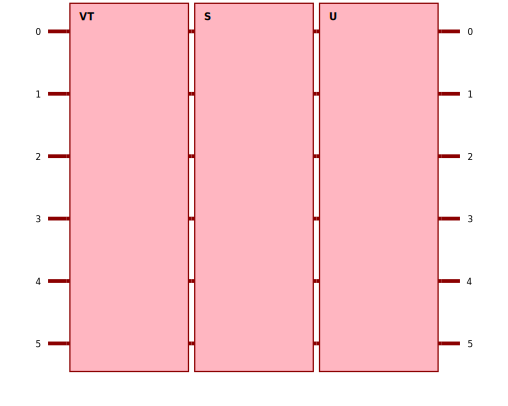

In [9]:
circuit = (pcvl.Circuit(6)
      .add(0, v_circ, merge=False)
      .add(0, s_circ, merge=False)
      .add(0, u_circ, merge=False)
)

pcvl.pdisplay(circuit, recursive=False)

In [10]:
p = pcvl.Processor("SLOS", circuit)
p.min_detected_photons_filter(1)
p.compute_physical_logical_perf(True)

ps = pcvl.PostSelect("[0,1] == 1 & [2,3] == 1 & [4,5] == 1")
p.set_postselection(ps)

p.with_input(pcvl.BasicState([1,0,0,1,0,1]))
sampler = Sampler(p)
probs = sampler.probs()
print(probs['results'])

{
	|1,0,0,1,0,1>: 0.04619785974962733
	|1,0,1,0,0,1>: 0.5062273202936941
	|1,0,0,1,1,0>: 0.3714056123723119
	|1,0,1,0,1,0>: 0.07616920758436659
}
